# Preprocessing

In [2]:
import cv2 as ocr
import sys
import gc
import numpy as np
from os import listdir
from os.path import isfile, join
# imageDir = 'resized_images_handprinted/images'
# imageFiles = [imageDir+'/'+f for f in listdir(imageDir) if isfile(join(imageDir, f))]
# imageClass = []
# input_data_list = []


In [5]:
def get_imageClass():
    
    for imgF in imageFiles:
        imageClass.append(int(imgF.split('/')[2][0:4]))
   

In [7]:
from collections import Counter
import pandas as pd
imageDir = 'Gen2000-Top10-64x64/TrainingSet'
imageFiles = [imageDir+'/'+f for f in listdir(imageDir) if isfile(join(imageDir, f))]
imageClass = []
get_imageClass()
# df = pd.DataFrame()
# df['classValue'] = Counter(imageClass).keys()
# df['classCount'] = Counter(imageClass).values()
# print(df)


# df1 = pd.DataFrame()
# df1['imagePath'] = imageFiles
# df1['imageClass'] = imageClass
# print(df1)
len(Counter(imageClass).keys())

10

In [ ]:
def get_maxwidth_maxheight():
    minWidthSize = 0
    minHeightSize = 0
    maxWidthSize = 0
    maxHeightSize = 0
    for imgF in imageFiles:
        imageClass.append(int(imgF.split('/')[2][0:4]))
        img = ocr.imread(imgF)
    #     print(imageFiles[t])
        if(maxWidthSize<img.shape[0]):
            maxWidthSize = img.shape[0]
            maxWidthImgName = imgF
        if(maxHeightSize<img.shape[1]):
            maxHeightSize = img.shape[1]   
            maxHeightImgName = imgF
#     print(maxWidthImgName + ',\n' + maxHeightImgName)
    return (maxWidthSize,maxHeightSize)

def resize_images():
    maxwidth,maxheight = (500,500) #get_maxwidth_maxheight()
    cons = 255
    #img-dir_path is the path of the directory which has the images in the class directory

    
    for imgF in imageFiles:
        input_img=ocr.imread(imgF)
        if(input_img.shape[1]>300):
            #                 cv2.imshow("images", input_img)
            #                 cv2.waitKey(0)
            c = input_img.shape[1]/2
            dim = (int(c), int(input_img.shape[0]/2))
            input_img = cv2.resize(input_img, dim, interpolation = cv2.INTER_AREA)
            #                 cv2.imshow("images", input_img)
            #                 cv2.waitKey(0)
            cv2.imwrite(data_path + '/'+ dataset + '/'+ img, input_img
        #             input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        shp = input_img.shape
        #             print('np.shape(input_img): ',shp)
        input_img = input_img.transpose(2,1,0).reshape(shp[2],shp[1],shp[0])
        leftPad = round(float((maxwidth - shp[1])) / 2) if ((maxwidth - shp[1])>0) else 0
        rightPad = round(float(maxwidth - shp[1]) - leftPad) if ((maxwidth - shp[1])>0) else 0
        topPad = round(float((maxheight - shp[0])) / 2) if ((maxheight - shp[0])>0) else 0
        bottomPad = round(float(maxheight - shp[0]) - topPad) if ((maxheight - shp[0])>0) else 0
        pads = ((leftPad,rightPad),(topPad,bottomPad))
        img_arr = np.ndarray((3,maxwidth,maxheight),np.int)
        
        try:
            for i,x in enumerate(input_img):
                x_p = np.pad(x,pads,
                            'constant',
                             constant_values=cons)
                img_arr[i,:,:] = x_p
            ii = np.uint8(img_arr).transpose(2,1,0)
    #             ii = np.asarray(ii)
            ocr.imwrite("resized_"+imgF, ii)
        except Exception as e:
            print(imgF+'->caused error->pads:'+str(pads))
            print(e)
        gc.collect()
#         input_data_list.append(ii)
#         input_label_list.append(FolderNumber)

# Code

In [ ]:
import cv2 as ocr
import sys
import gc
import numpy as np
from os import listdir
from os.path import isfile, join
import tensorflow as tf
import keras
import pandas as pd
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split
from sklearn.utils import shuffle
from tqdm import tqdm, trange


imageDir = 'resized_images_handprinted/images'
imageFiles = [imageDir+'/'+f for f in listdir(imageDir) if isfile(join(imageDir, f))]
input_label_list = []
input_data_list = []
try:
    counter = 0
    for imgF in tqdm(imageFiles, total=len(imageFiles), unit="files"):
        input_label_list.append(int(imgF.split('/')[2][0:4]))
        img = ocr.imread(imageFiles[0],ocr.COLOR_BGR2GRAY)        

        input_data_list.append(ocr.imread(imageFiles[0],ocr.COLOR_BGR2GRAY))
        
#         gc.collect()
#         counter += 1
#         if counter == 1000 :
#             break
except Exception as e:
    print(e)

num_classes = max(input_label_list)+1
INP_IMGS = np.array(input_data_list)
LABELS = np.array(input_label_list)
Y = keras.utils.to_categorical(LABELS)
INP_IMGS = INP_IMGS.astype('float32')
INP_IMGS /= 255
x,y = shuffle(INP_IMGS,Y, random_state=2)


x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=2)

# x_train = x_train.reshape(-1,x_train.shape[1],x_train.shape[2],1)
# x_test = x_test.reshape(-1,x_test.shape[1],x_test.shape[2],1)



In [ ]:
INP_IMGS[0][38][59][0]

In [ ]:

LOG_DIR = 'logs/CNN_32_32_64_64_128_128_D128'
tensorCallback = keras.callbacks.TensorBoard(log_dir=LOG_DIR
                            , batch_size=32
                            , write_graph=True
                            , write_grads=True
                            , write_images=False
                            , embeddings_freq=0
                            , embeddings_layer_names=None
                            , embeddings_metadata=None)


filepath="weights/weights-cnn-{epoch:02d}-{loss:.2f}-{acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath
           , monitor='loss'
           , verbose=1
           , save_best_only=True
           , mode='min'
            ,period = 1
           , save_weights_only=True)
callbacks_list = [tensorCallback,checkpoint]

In [ ]:

# model.to_json()

In [ ]:
batches = 1
hist = model.fit(x_train, y_train,
          batch_size=batches,
          epochs=epochs,
          verbose=2,
#                  ,
#            validation_data=(x_test, y_test)#,
         callbacks=callbacks_list
          )


In [ ]:
len(y_train)
len(x_train)

In [ ]:
y_train.shape

In [ ]:
%matplotlib inline
batches = 1
hist = model.fit(x_train, y_train,
          batch_size=batches,
          epochs=epochs,
          verbose=2,
#                  ,
#            validation_data=(x_test, y_test)#,
         callbacks=callbacks_list
          )

df = pd.DataFrame(hist.history)
df.plot(subplots=True)

In [ ]:
len(input_label_list)

In [ ]:
input_data_list

In [ ]:
import cv2 as ocr
def BatchGenerator():
    x_train = ocr.imread('resized_images_handprinted/images/0001a_num1.png')
    y_train = 1
    return x_train, y_train

In [ ]:
im, c = BatchGenerator()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import math
from tqdm import tqdm

datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

df = pd.read_csv('classTable.csv', names=['classValue','classCount'],header=None)
df = df.iloc[1:len(df)-1] # Removing the first row
TotalClasses = len(df)
for index in tqdm(range(0,TotalClasses)):  #Iterating over classes
    classValue = int(df.iloc[index]['classValue'])
    classCount = int(df.iloc[index]['classCount'])
   
#     print ('-----Generating------Class:' + str(classValue) + ' with ' + str(classCount) + ' to '+ str(math.ceil(1000/classCount)*classCount) + ' images------------')
   
    df1 = pd.read_csv('datasetPathAndClass.csv', names=['imagePath','imageClass'],header=None)
    opdf = df1.query('imageClass == \''+ str(classValue) + '\'')
    for indexPath in range(0,classCount):
       imagePath = opdf.iloc[indexPath]['imagePath']
       
       img = load_img(imagePath)  # this is a PIL image
       x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
       x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
       
       # the .flow() command below generates batches of randomly transformed images
       # and saves the results to the `preview/` directory
       approxNum = math.ceil(1000/classCount)
       GenPerImage = 0
        for batch in datagen.flow(x, batch_size=1,
                                save_to_dir='GenData', save_prefix=(str(classValue).zfill(4)), save_format='jpeg'):

In [ ]:
import cv2 as ocr
import sys
import gc
import numpy as np
from os import listdir
from os.path import isfile, join
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import math
from tqdm import tqdm
import keras
from keras.utils import np_utils
import pandas as pd
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Input, Conv2D, Dense,MaxPooling2D, Dropout, Flatten

In [ ]:
# image files commented coz we are training on top 10 classes
# imageDir = 'resized_images_handprinted/images'
# imageFiles = [imageDir+'/'+f for f in listdir(imageDir) if isfile(join(imageDir, f))]
# imageFiles = imageFiles[:1000]
# imageClass = []

filesCount = len(imageFiles)

imageClass =[]
for imgF in imageFiles:
    imageClass.append(int(imgF.split('/')[2][0:4]))
    
print(imageClass)
num_classes = max(imageClass)+1
print('num_images=',filesCount)
print('num_classes=',num_classes)
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      rescale=1./255,
      fill_mode='nearest')

# def getImages(num_images = 10, slideBy = 1, slideCounter = 0):
#     try:
#         input_label_list = []
#         input_data_list = []
#         counter = 0
#         if (slideCounter+num_images) == len(imageFiles):
#             slideCounter = 0
            
#         for imgF in imageFiles[slideCounter:slideCounter+num_images]:
# #             print('slideConuter:',slideCounter)
# #             input_label_list.append(imgF)
#             input_label_list.append(int(imgF.split('/')[2][0:4]))
#             input_data_list.append(ocr.imread(imgF))
# #             input_data_list.append(imgF)            
#             counter += 1
#             if counter == num_images :
#                 break              
#         #slide for Next batch
#         slideCounter = slideCounter + slideBy
#         return np.array(input_data_list), np.array(input_label_list)
#     except Exception as e:
#         print(e)

def getImages(windowSize=10, stepNumber=0):
    try:
        input_label_list = []
        input_data_list = []
        counter = 0
        start = stepNumber
        end = stepNumber + windowSize

        for imgF in imageFiles[start:end]:
            input_label_list.append(int((imgF.split('/')[2])[0:4]))
            input_data_list.append(ocr.imread(imgF))

        return (np.array(input_data_list), np.array(input_label_list))
    except Exception as e:
        print (e)

def myGenerator():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    y_train = np_utils.to_categorical(y_train,10)
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255
    X_test /= 255
    while 1:
        for i in range(1875): # 1875 * 32 = 60000 -> # of training samples
            if i%125==0:
                print ("i = " + str(i))
            yield X_train[i*32:(i+1)*32], y_train[i*32:(i+1)*32]

In [ ]:

config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.9
set_session(tf.Session(config=config))
input_shape  = (64,64,3)
model = Sequential()
model.add(Conv2D(64,kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),
              metrics=['accuracy'])
model.summary()


In [ ]:
# print(x_train.shape)
# for x in x_train:
#     ocr.imshow('img',x)
#     ocr.waitKey(0)
# #     print(np.argmax(y))
%matplotlib inline    

df = pd.DataFrame()
# from matplotlib.pyplot import imshow 

# # print(len(x_batch))
batches = 0

b_s = 1
num_samples = 2
epochs = 10
batches = 0
slideBySteps = num_samples - 1
batch_metrics = None
batch_metric_loss = []
batch_metric_acc = []
df = pd.DataFrame()
for epoch in range(1, epochs+1):
    for step in tqdm(range(0, len(imageFiles) - num_samples),
                     total=(len(imageFiles) - num_samples), unit='files'):
        x_train, y_train = getImages(stepNumber=step,windowSize=num_samples)
#         print(x_train.shape)
#         print(y_train.shape)
        y_train = np_utils.to_categorical(y_train,num_classes)
        for x_batch, y_batch in datagen.flow(x_train,y_train, batch_size=b_s):
#             print(x_batch.shape)
#             print(y_batch.shape)
#             for y in y_batch:
#                 print(np.argmax(y))
            batch_metrics = model.train_on_batch(x_batch, y_batch)
            batches += 1
            if batches >= (num_samples/b_s):
                batches = 0
                break
        batch_metric_loss.append(batch_metrics[0])
        batch_metric_acc.append(batch_metrics[1])
#         if slideCnt == 3:
#             break
    filepath="weights/top10-datagen-weights-deep-cnn.hdf5"
    model.save(filepath)
    df = pd.DataFrame()
    df['accuracy'] = batch_metric_acc
    df['loss'] = batch_metric_loss
    ax = df.plot(subplots=True)
    accChart = ax[0]
    lossChart = ax[1]
    figAcc =  accChart.get_figure()
    figAcc.savefig('AccChart.png')
    figLoss =  lossChart.get_figure()
    figLoss.savefig('LossChart.png')
df.to_csv('loss_acc_metrics.csv')
#     break
#             model.train_on_batch(x_batch, y_batch)
#             batches += 1
#             if batches >= ( b_s * 3 ):
#                 break
        
    
        
            #             ocr.imshow('img',x)
#             ocr.waitKey(0)
#         y_train = np_utils.to_categorical(y_train,num_classes)

#         for x_batch, y_batch in datagen.flow(x_train,y_train, batch_size=b_s):
#         #     print(y_batch)

#             model.train_on_batch(x_batch, y_batch)
#             batches += 1
#             if batches >= 100:
#                 break

    

In [ ]:
print(batch_metric_)
df['accuracy'] = batch_metric_acc
df['loss'] = batch_metric_loss

ax = df.plot(subplots=True)
accChart = ax[0]
lossChart = ax[1]
figAcc =  accChart.get_figure()
figAcc.savefig('AccChart.png')
figLoss =  lossChart.get_figure()
figLoss.savefig('LossChart.png')

In [ ]:
import heapq
for idx in range(0,29):
    print('=-----------=')
    print('ActualClass : ',np.argmax(y_train[idx]))
    print(x_train[idx].shape)
    # ocr.imshow('img',x_train[idx])
    # ocr.waitKey(0)
    arr = np.array([1, 3, 2, 4, 5])
    # arr.argsort()[-3:][::-1]
    print(model.predict(x_train[idx].reshape(1,500,500,3)/255)[0].argsort()[-4:][::-1])
    print(heapq.nlargest(3,model.predict(x_train[idx].reshape(1,500,500,3)/255)[0]))

In [ ]:
ax1 = plt.subplot2grid((5,4), (0,0))
ax2 = plt.subplot2grid((5,4), (1,1))
ax3 = plt.subplot2grid((5,4), (2, 2))
ax4 = plt.subplot2grid((5,4), (3, 3))
ax5 = plt.subplot2grid((5,4), (4, 0))

In [ ]:
len(imageFiles)

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('classTable.csv', names=['classValue','classCount'],header=None)
df = df.iloc[1:len(df)-1] # Removing the first row
TotalClasses = len(df)

cV = []
cC = []

for index in range(0,TotalClasses):  #Iterating over classes
    classValue = int(df.iloc[index]['classValue'])
    classCount = int(df.iloc[index]['classCount'])
    cV.append(classValue)
    cC.append(classCount)

topK = 2
index = np.argpartition(cC, -topK)[-topK:]

TopKimagePathList = []
classCounter = 1
newClassName = []

for i in index:
    if cv[i]==217 or cv[i]==65:
        df1 = pd.read_csv('datasetPathAndClass.csv', names=['imagePath','imageClass'],header=None)
        opdf = df1.query('imageClass == \''+ str(cV[i]) + '\'')
        for indexPath in range(0,len(opdf)):
            newClassName.append(classCounter)
            imagePath = opdf.iloc[indexPath]['imagePath']
            TopKimagePathList.append(imagePath)
        classCounter+=1


df2 = pd.DataFrame()
df2['FileNames'] = TopKimagePathList
df2['ClassNames'] = newClassName
df2.to_csv('top_10_new_classes.csv')
len(TopKimagePathList)
# print(TopKimagePathList)

In [10]:
import cv2 as ocr
import sys
import gc
import numpy as np
from os import listdir
from os.path import isfile, join
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import math
from tqdm import tqdm
import keras
from keras.utils import np_utils
import pandas as pd
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Input, Conv2D, Dense,MaxPooling2D, Dropout, Flatten
import tensorflow as tf
import keras
import pandas as pd
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split
from sklearn.utils import shuffle
from tqdm import tqdm, trange

Using TensorFlow backend.
C:\Anaconda3\Lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
def getData(dataPath='pathToData',channels = 0):
    input_label_list = []
    input_data_list = []
    imageFiles = []
    imageFiles = [dataPath+'/'+f for f in listdir(dataPath) if isfile(join(dataPath, f))]
    for imgF in tqdm(imageFiles, total=len(imageFiles), unit="files"):            
        input_label_list.append(int(imgF.split('/')[2][0:4]))
        input_data_list.append(ocr.imread(imgF,channels))
    return np.array(input_data_list),np.array(input_label_list)

In [13]:


# imageFiles = TopKimagePathList
counter = 0
prevClass = -1
imageDirTrain = 'Gen2000-Top10-64x64/TrainingSet'
imageDirVal = 'Gen2000-Top10-64x64/ValidationSet'
print('Getting Training Data..')
x_train,y_train = getData(dataPath=imageDirTrain)
print('Getting Validation Data..')
x_test,y_test = getData(dataPath=imageDirVal)

# print(input_label_list)
nmbr_classes = max(y_train)+1

y_train = keras.utils.to_categorical(y_train,num_classes=nmbr_classes)
y_test = keras.utils.to_categorical(y_test,num_classes=nmbr_classes)
x_train = x_train.astype('float32')
x_train = (255.1-x_train)/255.0
x_train = x_train.reshape(-1,64,64,1)
x_test = x_test.astype('float32')
x_test = (255.1-x_test)/255.0
x_test = x_test.reshape(-1,64,64,1)
x_train,y_train = shuffle(x_train,y_train, random_state=2)



config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.7
set_session(tf.Session(config=config))
input_shape  = (64,64,1)
model = Sequential()
model.add(Conv2D(32,kernel_size=(3, 3),activation='relu',input_shape=input_shape))
# model.add(Conv2D(32, (3, 3), activation='relu'))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2),input_shape=input_shape))
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(nmbr_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True),
#               optimizer = keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.summary()


LOG_DIR = 'logs/CNN_VGG'
tensorCallback = keras.callbacks.TensorBoard(log_dir=LOG_DIR
                            , batch_size=32
                            , write_graph=True
                            , write_grads=True
                            , write_images=False
                            , embeddings_freq=0
                            , embeddings_layer_names=None
                            , embeddings_metadata=None)


filepath="weights/inverted-10-Class-valSplit-{epoch:02d}-{loss:.2f}-{acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath
           , monitor='loss'
           , verbose=1
           , save_best_only=True
           , mode='min'
            ,period = 100
           , save_weights_only=True)

callbacks_list = [tensorCallback,checkpoint]

Getting Training Data..


100%|████████████████████████████████████████████████████████████████████████| 17053/17053 [00:40<00:00, 417.81files/s]


Getting Validation Data..


100%|██████████████████████████████████████████████████████████████████████████| 1064/1064 [00:01<00:00, 719.26files/s]


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        320       
_________________________________________________________________
dropout_1 (Dropout)          (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
__________

In [2]:
# ctr = 0
# for imgt in input_data_list:
#     ocr.imshow('img',imgt)
#     ocr.waitKey(0)
#     ctr+=1
#     if ctr==10:
#         break

In [14]:
x_train.shape

(17053, 64, 64, 1)

In [ ]:
%matplotlib inline
batches = 64
epochs = 50
hist = model.fit(x_train, y_train,
        batch_size=batches,
        epochs=epochs,
        verbose=2,
        shuffle=True,
        validation_data = (x_test,y_test),
        callbacks=callbacks_list)

Train on 17053 samples, validate on 1064 samples
Epoch 1/50


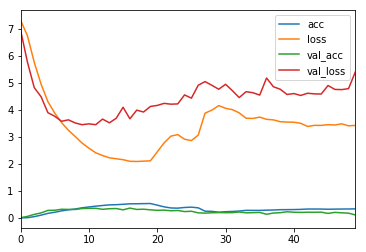

In [27]:
df = pd.DataFrame(hist.history)
df.plot()

In [8]:
df.to_csv('neuralnet-inverted-10-classes.csv')

In [ ]:
import tensorflow as tf
import time
import numpy as np
import cv2 as ocr
dim = 4096
l_  = tf.placeholder(tf.float32, [dim], name='left')
r_  = tf.placeholder(tf.float32, [dim], name='right')
# y_ = 
def distance(l,r):
    l2diff = tf.sqrt( tf.reduce_sum(tf.square(tf.subtract(l, r)),reduction_indices=None))
    return l2diff

def distnp(l,r):
    l2diff = np.sqrt(np.sum(np.square(np.subtract(l,r))))
    return l2diff
distance_ = distance(l_, r_)


x1 = np.array(ocr.imread('resized_images_handprinted/images/0001a_num1.png',0)).flatten()/255.0
x2 = np.array(ocr.imread('resized_images_handprinted/images/0001a_num1.png',0)).flatten()/255.0
print(x1.shape)
with tf.Session() as sess:
    tf.initialize_all_variables().run()
    start_time = time.time()
    # l = sess.run(distance_, feed_dict={l_:x1, r_:x2})
    print('tf_result:',sess.run(distance_, feed_dict={l_:x1, r_:x2}))
    duration = time.time() - start_time
    print('tf_duration:',duration)
print('----------------------')
start_time = time.time()
print('np_result',distnp(x1,x2))
duration = time.time() - start_time
print('np-duration:',duration)

In [ ]:
x1/255.0

In [ ]:
x2/255.0

In [ ]:
x_train[0].shape

In [ ]:
def maxpool2d(x, k=2, layer_name='mp'):
    # MaxPool2D wrapper
    return tf.nn.max_pool(
    value = x,
    ksize = [1,k,k,1],
    strides = [1,k,k,1],
    padding = 'SAME',
    data_format= 'NHWC',
    name = layer_name
    )

In [ ]:
tf.initialize_all_variables()

with tf.Session() as sess:
    imgLeft = (255.0-ocr.imread('resized_images_handprinted/images/0001a_num1.png',0))/255.0
    imgLeft = imgLeft.reshape(1,64,64,1)
    mpLeft1 = maxpool2d(imgLeft,layer_name='left-max-pool-layer-1')
    mpLeft2 = maxpool2d(mpLeft1,layer_name='left-max-pool-layer-2')
    v = mpLeft2.eval()
    print(v)
    

In [29]:
dfAll = pd.DataFrame.from_csv('allData_loss_acc_metrics.csv')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000227960A2780>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000227BF907048>], dtype=object)

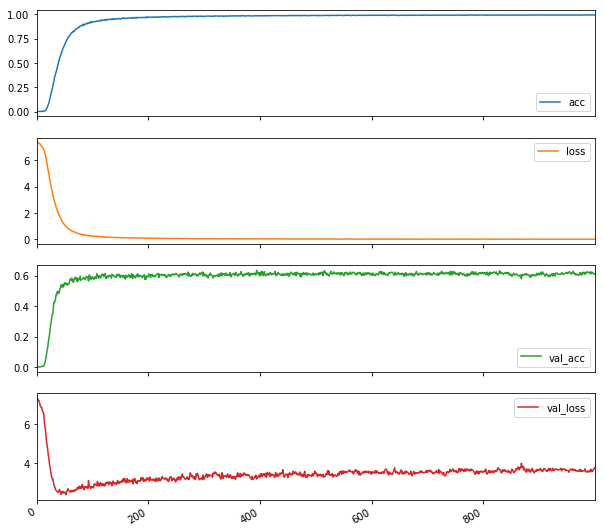

In [31]:
dfAll.plot(subplots=True, figsize=(10,10))

In [2]:
import numpy as np
a = [1,2,3,4,5,6]
np.average(a)

3.5